In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [2]:
df = pd.read_csv("Dataset/best_collection2.csv")

In [3]:
df.columns=["country","total_cases","new_cases","total_deaths","new_deaths","total_recovered","active_cases","critical","cases_per_mill","deaths_per_mill","total_tests","tests_per_million","continent"]

In [4]:
df.head()

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,critical,cases_per_mill,deaths_per_mill,total_tests,tests_per_million,continent
0,Europe,"1,047,811","18,597","97,966","1,738","294,190","655,655","28,750",NaN,NaN,NaN,NaN,Europe
1,North America,"764,138","4,383","39,666",244,"77,617","646,855","14,657",NaN,NaN,NaN,NaN,North America
2,USA,"712,719","2,984","37,289",135,"63,778","611,652","13,544","2,153",113,"3,595,769","10,863",North America
3,Asia,"364,687","6,503","14,206",140,"173,433","177,048","6,352",NaN,NaN,NaN,NaN,Asia
4,Spain,"191,726",887,"20,043",41,"74,797","96,886","7,371","4,101",429,"930,230","19,896",Europe


In [5]:
#dropping irrelevant columns
df.drop("new_deaths",axis=1,inplace=True)
df.drop("new_cases",axis=1,inplace=True)
df.drop("total_tests",axis=1,inplace=True)
df.drop("tests_per_million",axis=1,inplace=True)

In [6]:
df.isna().sum()

country             0
total_cases         0
total_deaths       47
total_recovered    19
active_cases        0
critical           78
cases_per_mill      8
deaths_per_mill    55
continent           2
dtype: int64

In [7]:
#removing continents from country column
continents = df.continent.unique().tolist()
for i in continents:
    df.drop(df[df.country==str(i)].index, inplace = True)

In [8]:
df.total_deaths.fillna(0,inplace=True)
df.total_recovered.fillna(0,inplace =True)
df.active_cases.fillna(0,inplace=True)
df.critical.fillna(0,inplace=True)
df.deaths_per_mill.fillna(0,inplace=True)
df.cases_per_mill.fillna(0,inplace=True)
df.drop(df[df.continent.isna()].index,axis=0,inplace=True)

In [9]:
def convert(i):
    i = str(i).replace(',', '')
    i = np.float(i)
    return i
df.total_cases=df.total_cases.apply(convert)
df.total_deaths=df.total_deaths.apply(convert)
df.total_recovered=df.total_recovered.apply(convert)
df.active_cases = df.active_cases.apply(convert)
df.critical = df.critical.apply(convert)
df.deaths_per_mill = df.deaths_per_mill.apply(convert)
df.cases_per_mill = df.cases_per_mill.apply(convert)

In [10]:
df.isna().sum()

country            0
total_cases        0
total_deaths       0
total_recovered    0
active_cases       0
critical           0
cases_per_mill     0
deaths_per_mill    0
continent          0
dtype: int64

In [11]:
#reassinging cases_per_mill col by computing other columns
cases_per_mill=[]
for i,row in df[["cases_per_mill"]].iterrows():
    if(row["cases_per_mill"] in ([0])):
        cases_per_mill.append(i)

In [12]:
#reassinging deaths_per_mill col by computing other columns
deaths_per_mill=[]
for i,row in df[["deaths_per_mill"]].iterrows():
    if(row["deaths_per_mill"] in ([0])):
        deaths_per_mill.append(i)

In [13]:
#reassinging total_recovered col by computing other columns
recovered=[]
for i,row in df[["total_recovered"]].iterrows():
    if(row["total_recovered"] in ([0])):
        recovered.append(i)

In [14]:
#reassinging total_deaths col by computing other columns
deaths=[]
for i,row in df[["total_deaths"]].iterrows():
    if(row["total_deaths"] in ([0])):
        deaths.append(i)

In [15]:
#computing
for i in recovered:
    df.total_recovered.loc[i]=df.total_cases.loc[i]-df.active_cases.loc[i]
for i in deaths:
    df.total_deaths.loc[i]=df.total_cases.loc[i]-(df.active_cases.loc[i]+df.total_recovered.loc[i])

for i in cases_per_mill:
    df.cases_per_mill.loc[i]=df.cases_per_mill.mean()
for i in deaths_per_mill:
    df.deaths_per_mill.loc[i]=df.deaths_per_mill.mean()

d:\programs\anaconda\envs\py36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
#showing inconsistent values
for i, row in df.iterrows():
    if(row["deaths_per_mill"]>row["total_cases"]):
        string = "total deaths: "+str(df["total_deaths"].loc[i])+" < "+ "deaths per million: "+str(df["deaths_per_mill"].loc[i])
        print(string)
#removing inconsistent values
df.drop(df[(df["deaths_per_mill"]>df["total_deaths"])].index,axis=0,inplace=True)        
df.drop(df[(df["deaths_per_mill"]>df["total_cases"])].index,axis=0,inplace=True)   

total deaths: 39.0 < deaths per million: 1149.0
total deaths: 9.0 < deaths per million: 210.0
total deaths: 2.0 < deaths per million: 52.0
total deaths: 0.0 < deaths per million: 31.14630208157026
total deaths: 0.0 < deaths per million: 31.29391488764405
total deaths: 0.0 < deaths per million: 31.442227280476484
total deaths: 3.0 < deaths per million: 31.0
total deaths: 0.0 < deaths per million: 31.59124257564462
total deaths: 0.0 < deaths per million: 31.740964104439144
total deaths: 0.0 < deaths per million: 31.891395213938857
total deaths: 0.0 < deaths per million: 32.04253926708549
total deaths: 0.0 < deaths per million: 32.194399642758874
total deaths: 0.0 < deaths per million: 32.34697973585252
total deaths: 0.0 < deaths per million: 32.50028295734945
total deaths: 0.0 < deaths per million: 32.6543127343985
total deaths: 0.0 < deaths per million: 32.80907251039091
total deaths: 0.0 < deaths per million: 32.96456574503731
total deaths: 0.0 < deaths per million: 33.120795914445075


In [17]:
#create columns for long and lat
list=df.country.tolist()
lats=[]
long=[]
geolocator = Nominatim(user_agent="COVID-19 cases-death prediction")
for i in list:
    print(i)
    location = geolocator.geocode(str(i))
    lats.append(location.latitude)
    long.append(location.longitude)
df["lat"]=lats
df["lng"]=long

USA
Spain
Italy
France
Germany
UK
China
Iran
Turkey
Belgium
Russia
Brazil
Canada
Netherlands
Switzerland
Portugal
India
Austria
Ireland
Sweden
Peru
Israel
S. Korea
Japan
Chile
Poland
Ecuador
Romania
Saudi Arabia
Oceania
Pakistan
Denmark
Norway
Mexico
Australia
Czechia
UAE
Indonesia
Philippines
Serbia
Singapore
Malaysia
Ukraine
Qatar
Belarus
Panama
Dominican Republic
Finland
Colombia
Egypt
South Africa
Argentina
Thailand
Morocco
Algeria
Moldova
Greece
Bangladesh
Hungary
Croatia
Bahrain
Kuwait
Kazakhstan
Estonia
Iraq
Uzbekistan
New Zealand
Azerbaijan
Slovenia
Bosnia and Herzegovina
Armenia
Lithuania
Oman
North Macedonia
Slovakia
Hong Kong
Cameroon
Cuba
Afghanistan
Bulgaria
Tunisia
Ghana
Cyprus
Ivory Coast
Djibouti
Latvia
Lebanon
Costa Rica
Niger
Burkina Faso
Albania
Uruguay
Kyrgyzstan
Bolivia
Nigeria
Guinea
Honduras
Palestine
Jordan
Taiwan
Georgia
Senegal
Mauritius
DRC
Kenya
Sri Lanka
Guatemala
Venezuela
Mali
Paraguay
El Salvador
Jamaica
Tanzania
Congo
Somalia
Trinidad and Tobago
Gabon
E

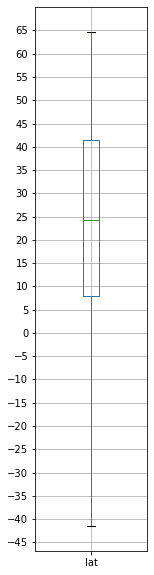

In [18]:
ax1=df[["lat"]].boxplot(figsize=(2,10), column='lat', showfliers=True)
ax1.set_yticks(np.arange(-45,70,5))
plt.show()

In [19]:
df["lat_cat"]=df.lat.apply(lambda x: 0)
#categorizing target variable
def categorize_lat(x):    
    result=0;
    if x>=-40 and x<=65:
        for i in range(-40,65,5):
            j=i
            i+=5
            if(x>=j and x<i):
                string = str(x) +" >= "+str(j)+ " and "+ str(x) +" < " +str(i) +" return = "+str(result)
                print(string)
                break
            else:
                result+=1
                continue
        return result
    else:
        return 21
    
df1 = df[["lat"]].sort_values("lat",ascending=True)
df["lat_cat"]=df1[df1.columns[0]].apply(categorize_lat)

-34.9964963 >= -35 and -34.9964963 < -30 return = 1
-32.8755548 >= -35 and -32.8755548 < -30 return = 1
-31.7613365 >= -35 and -31.7613365 < -30 return = 1
-28.8166236 >= -30 and -28.8166236 < -25 return = 2
-26.5624806 >= -30 and -26.5624806 < -25 return = 2
-24.7761086 >= -25 and -24.7761086 < -20 return = 3
-23.3165935 >= -25 and -23.3165935 < -20 return = 3
-23.1681782 >= -25 and -23.1681782 < -20 return = 3
-20.2759451 >= -25 and -20.2759451 < -20 return = 3
-18.4554963 >= -20 and -18.4554963 < -15 return = 4
-18.3128 >= -20 and -18.3128 < -15 return = 4
-17.0568696 >= -20 and -17.0568696 < -15 return = 4
-14.5186239 >= -15 and -14.5186239 < -10 return = 5
-13.2687204 >= -15 and -13.2687204 < -10 return = 5
-11.8775768 >= -15 and -11.8775768 < -10 return = 5
-10.3333333 >= -15 and -10.3333333 < -10 return = 5
-6.8699697 >= -10 and -6.8699697 < -5 return = 6
-6.5247123 >= -10 and -6.5247123 < -5 return = 6
-3.3634357 >= -5 and -3.3634357 < 0 return = 7
-2.9814344 >= -5 and -2.98143

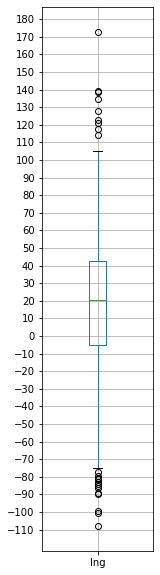

In [20]:
ax1=df[["lng"]].boxplot(figsize=(2,10), column='lng', showfliers=True)
ax1.set_yticks(np.arange(-110,190,10))
plt.show()

In [21]:
df["lng_cat"]=df.lng.apply(lambda x: 0)
#categorizing target variable
def categorize_lng(x):    
    result=0;
    if x>=-110 and x<=140:
        for i in range(-110,140,12):
            j=i
            i+=12
            if(x>=j and x<i):
                string = str(x) +" >= "+str(j)+ " and "+ str(x) +" < " +str(i) +" return = "+str(result)
                print(string)
                break
            else:
                result+=1
                continue
        return result
    else:
        return 21
    
df1 = df[["lng"]].sort_values("lng",ascending=True)
df["lng_cat"]=df1[df1.columns[0]].apply(categorize_lng)

-107.9917071 >= -110 and -107.9917071 < -98 return = 0
-100.4458825 >= -110 and -100.4458825 < -98 return = 0
-99.1331785 >= -110 and -99.1331785 < -98 return = 0
-89.8988087 >= -98 and -89.8988087 < -86 return = 1
-88.9140683 >= -98 and -88.9140683 < -86 return = 1
-86.0755145 >= -98 and -86.0755145 < -86 return = 1
-85.2936911 >= -86 and -85.2936911 < -74 return = 2
-84.0739102 >= -86 and -84.0739102 < -74 return = 2
-83.1137366 >= -86 and -83.1137366 < -74 return = 2
-81.1308434 >= -86 and -81.1308434 < -74 return = 2
-80.8328748 >= -86 and -80.8328748 < -74 return = 2
-79.3666965 >= -86 and -79.3666965 < -74 return = 2
-77.1598454610168 >= -86 and -77.1598454610168 < -74 return = 2
-75.0458515 >= -86 and -75.0458515 < -74 return = 2
-73.783892 >= -74 and -73.783892 < -62 return = 3
-72.3570972 >= -74 and -72.3570972 < -62 return = 3
-71.3187697 >= -74 and -71.3187697 < -62 return = 3
-70.3028026 >= -74 and -70.3028026 < -62 return = 3
-66.1109318 >= -74 and -66.1109318 < -62 return

In [22]:
#total_recoverd

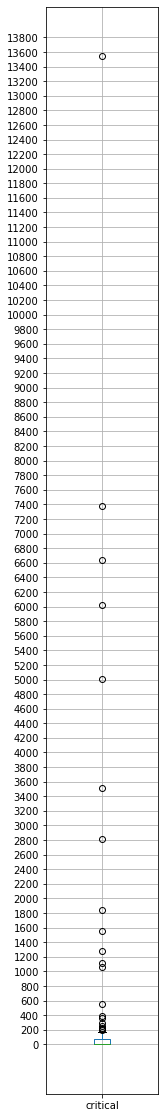

In [23]:
ax1=df.boxplot(figsize=(2,20),column="critical",showfliers=True)
ax1.set_yticks(np.arange(0,14000,200))
plt.show()

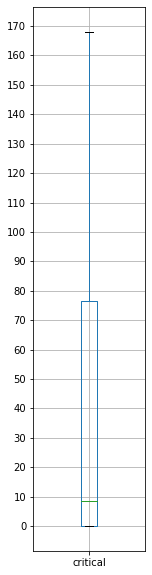

In [24]:
ax1=df.boxplot(figsize=(2,10),column="critical",showfliers=False)
ax1.set_yticks(np.arange(0,180,10))
plt.show()

In [25]:
df["critical_cat"] = df["critical"].apply(lambda x: 0)
def categorize_critical(x):
    if x == 0:
        return 0
    elif x==1:
        return 1
    elif x==3:
        return 2
    elif x==4:
        return 3
    elif x==5:
        return 4
    elif x>5 and x<=10:
        return 5
    elif x>10 and x<=30:
        return 6
    elif x>30 and x<=60:
        return 7
    elif x>60 and x<=160:
        return 8
    elif x>60 and x<=1060:
        return 9
    elif x>60 and x<=2060:
        return 10
    elif x>60 and x<=3060:
        return 11
    elif x>60 and x<=4060:
        return 12
    elif x>60 and x<=5060:
        return 13
    elif x>60 and x<=6060:
        return 14
    elif x>60 and x<=7060:
        return 15
    elif x>60 and x<=8060:
        return 16
    else:
        return 17
df1 = df[["critical"]].sort_values("critical",ascending=True)
df["critical_cat"]=df1[df1.columns[0]].apply(categorize_critical)

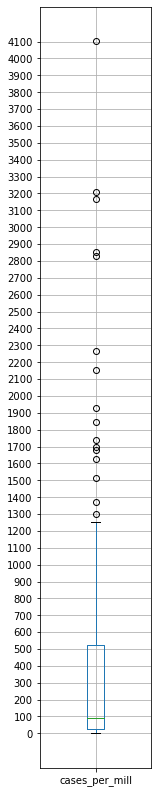

In [26]:
ax1=df.boxplot(figsize=(2,14),column="cases_per_mill",showfliers=True)
ax1.set_yticks(np.arange(0,4200,100))
plt.show()

In [27]:
df["cases_per_mill_cat"] = df["cases_per_mill"].apply(lambda x: 0)
def categorize_cases_per_mill(x):
    result = 0;
    if(x>=0 and x<100):
        for i in range(0,100,10):
            j=i
            i+=10
            if(x>=j and x<i):        
                string = str(result) + " "+str(x)
                print(string)
                break
            else:
                result+=1  
                continue
        return result
    elif(x>=100 and x<1300):
        result = 10
        for i in range(100,1300,130):
            j=i
            i+=130
            if(x>=j and x<i): 
                string = str(result) + " "+str(x)
                print(string)
                break            
            else:
                result+=1
                continue
        return result
    elif(x>=1300 and x<2300):
        result=20
    elif(x>=2300 and x<3300):
        result=21
    elif(x>=3300 and x<4300):
        result=22
    return result    
df1 = df[["cases_per_mill"]].sort_values("cases_per_mill",ascending=True)
df["cases_per_mill_cat"]=df1[df1.columns[0]].apply(categorize_cases_per_mill)

0 0.4
0 0.6
0 0.9
0 0.9
0 1.0
0 2.0
0 2.0
0 2.0
0 2.0
0 2.0
0 2.0
0 2.0
0 3.0
0 3.0
0 3.0
0 4.0
0 4.0
0 5.0
0 6.0
0 7.0
0 7.0
0 8.0
1 10.0
1 11.0
1 11.0
1 12.0
1 13.0
1 13.0
1 15.0
1 16.0
1 17.0
2 21.0
2 23.0
2 24.0
2 26.0
2 26.0
2 27.0
2 27.0
2 28.0
2 28.0
2 28.0
2 29.0
3 35.0
3 36.0
3 37.0
3 38.0
3 39.0
4 40.0
4 42.0
4 44.0
4 46.0
4 47.0
4 49.0
5 53.0
5 55.0
5 55.0
5 56.0
5 57.0
6 61.0
6 68.0
7 72.0
7 73.0
7 77.0
7 78.0
8 81.0
8 82.0
8 86.0
8 87.0
9 97.0
9 98.0
10 117.0
10 126.0
10 127.0
10 135.0
10 137.0
10 146.0
10 162.0
10 164.0
10 190.0
10 190.0
10 199.0
10 208.0
10 214.0
11 231.0
11 231.0
11 238.0
11 252.0
11 256.0
11 257.0
11 295.0
12 377.0
12 380.0
12 386.0
12 409.0
12 410.0
12 421.0
12 438.0
12 446.0
12 455.0
12 479.0
13 506.0
13 509.0
13 562.0
13 589.0
13 612.0
14 630.0
14 633.0
14 637.0
14 664.0
14 670.7679146919431
14 686.0
14 741.0
15 859.0
16 931.0
16 963.0
16 976.0
17 1024.0
17 1038.0
18 1140.0
18 1250.0
19 1298.0


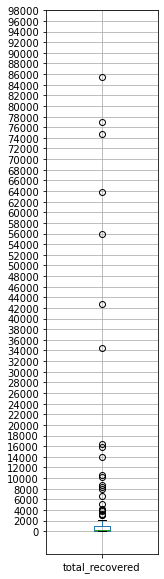

In [28]:
ax1=df.boxplot(figsize=(2,10),column="total_recovered",showfliers=True)
ax1.set_yticks(np.arange(0,100000,2000))
plt.show()

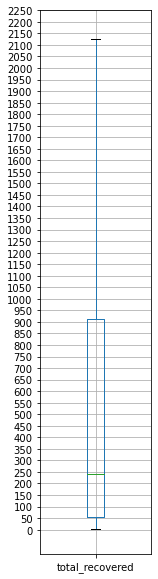

In [29]:
ax1=df.boxplot(figsize=(2,10),column="total_recovered",showfliers=False)
ax1.set_yticks(np.arange(0,2300,50))
plt.show()

In [30]:
df["total_recovered_cat"] = df["total_recovered"].apply(lambda x: 0)
def categorize_total_recovered(x):
    result = 0;
    if(x>=0 and x<250):
        for i in range(0,250,25):
            j=i
            i+=25
            if(x>=j and x<i):        
                string = str(result) + " "+str(x)
                print(string)
                break
            else:
                result+=1  
                continue
        return result
    elif(x>=250 and x<2250):
        result = 10
        for i in range(250,2250,200):
            j=i
            i+=200
            if(x>=j and x<i): 
                string = str(result) + " "+str(x)
                print(string)
                break            
            else:
                result+=1
                continue
        return result
    elif(x>=2250 and x<18000):
        result=20
    elif(x>=18000 and x<44000):
        result=21
    elif(x>=44000 and x<86000):
        result=22
    return result    
df1 = df[["total_recovered"]].sort_values("total_recovered",ascending=True)
df["total_recovered_cat"]=df1[df1.columns[0]].apply(categorize_total_recovered)

0 1.0
0 1.0
0 2.0
0 2.0
0 2.0
0 2.0
0 3.0
0 3.0
0 5.0
0 5.0
0 5.0
0 6.0
0 6.0
0 7.0
0 7.0
0 8.0
0 10.0
0 11.0
0 11.0
0 11.0
0 16.0
0 18.0
0 21.0
0 21.0
1 25.0
1 26.0
1 31.0
1 32.0
1 33.0
1 35.0
1 41.0
1 43.0
1 43.0
1 49.0
2 59.0
2 60.0
2 66.0
2 69.0
3 76.0
3 77.0
3 77.0
3 84.0
3 86.0
3 88.0
3 88.0
3 94.0
3 99.0
4 110.0
4 112.0
4 113.0
4 122.0
5 130.0
6 153.0
6 159.0
6 162.0
6 164.0
7 176.0
7 177.0
7 178.0
7 180.0
7 190.0
7 194.0
8 211.0
8 213.0
8 220.0
9 227.0
9 228.0
9 231.0
10 250.0
10 265.0
10 268.0
10 269.0
10 275.0
10 280.0
10 294.0
10 294.0
10 298.0
10 302.0
10 338.0
10 342.0
10 377.0
10 391.0
11 510.0
11 516.0
11 523.0
11 550.0
11 568.0
11 590.0
11 610.0
11 615.0
11 631.0
11 634.0
11 637.0
11 646.0
12 685.0
12 740.0
12 741.0
12 838.0
12 846.0
13 867.0
13 903.0
13 906.0
13 935.0
13 981.0
14 1183.0
14 1188.0
15 1329.0
17 1700.0
17 1730.0
17 1787.0
17 1832.0
18 2045.0
19 2125.0


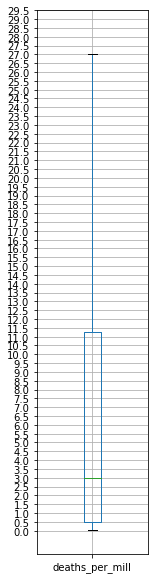

In [31]:
ax1=df[["deaths_per_mill"]].boxplot(figsize=(2,10), column='deaths_per_mill', showfliers=False)
ax1.set_yticks(np.arange(0,30,0.5))
plt.show()

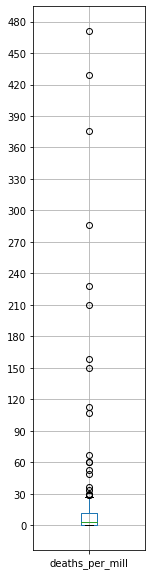

In [32]:
ax1=df[["deaths_per_mill"]].boxplot(figsize=(2,10), column='deaths_per_mill', showfliers=True)
ax1.set_yticks(np.arange(0,500,30))
plt.show()

In [33]:
df["deaths_per_mill_cat"]=df.deaths_per_mill.apply(lambda x: 0)
#categorizing target variable
def categorize_deaths(x):    
    result=0;
    if(x>=0 and x<0.3):
        result = 0
    elif(x>=0.3 and x<0.6):
        result = 1
    elif(x>=0.6 and x<0.9):
        result = 2
    elif(x>=0.9 and x<1.2):
        result = 3
    elif(x>=1.2 and x<1.5):
        result=4
    elif(x>=1.5 and x<1.8):
        result= 5
    elif(x>=1.8 and x<2.1):
        result= 6
    elif(x>=2.1 and x<2.4):
        result= 7
    elif(x>=2.4 and x<2.7):
        result= 8
    elif(x>=2.7 and x<3.0):
        result= 9
    elif(x>=3 and x<6):
        result= 10
    elif(x>=6 and x<9):
        result= 11
    elif(x>=9 and x<12):
        result = 12
    elif(x>=12 and x<15):
        result= 13
    elif(x>=15 and x<18):
        result= 14
    elif(x>=18 and x<21):
        result= 15
    elif(x>=21 and x<24):
        result= 16
    elif(x>=24 and x<27):
        result= 17
    elif(x>=27 and x<30):
        result= 18
    elif(x>=30 and x<90):
        result= 19
    elif(x>=90 and x<180):
        result= 20
    elif(x>=180 and x<300):
        result= 21
    elif(x>300):
        result = 22
    return result
df1 = df[["deaths_per_mill"]].sort_values("deaths_per_mill",ascending=True)
df["deaths_per_mill_cat"]=df1[df1.columns[0]].apply(categorize_deaths)

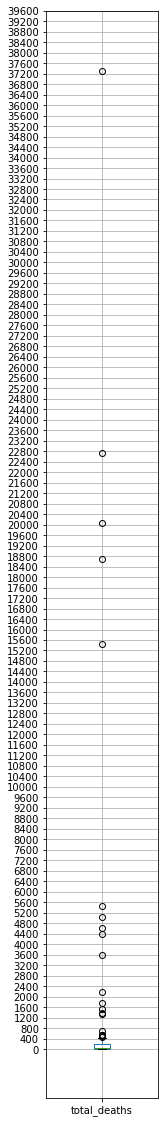

In [34]:
ax1=df[["total_deaths"]].boxplot(figsize=(2,20), column='total_deaths', showfliers=True)
ax1.set_yticks(np.arange(0,40000,400))
plt.show()

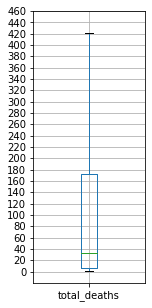

In [35]:
ax1=df[["total_deaths"]].boxplot(figsize=(2,5), column='total_deaths', showfliers=False)
ax1.set_yticks(np.arange(0,480,20))
plt.show()

In [36]:
df["total_deaths_cat"]=df.total_deaths.apply(lambda x: 0)
#categorizing target variable
def categorize_deaths(x):    
    result=0;
    if(x>=0 and x<5):
        result = 0
    elif(x>=5 and x<10):
        result = 1
    elif(x>=10 and x<15):
        result = 2
    elif(x>=15 and x<20):
        result = 3
    elif(x>=20 and x<25):
        result=4
    elif(x>=25 and x<30):
        result= 5
    elif(x>=30 and x<35):
        result= 6
    elif(x>=35 and x<40):
        result= 7
    elif(x>=40 and x<45):
        result= 8
    elif(x>=45 and x<50):
        result= 9
    elif(x>=50 and x<90):
        result= 10
    elif(x>=90 and x<130):
        result = 11
    elif(x>=170 and x<210):
        result = 12
    elif(x>=210 and x<250):
        result = 13
    elif(x>=250 and x<290):
        result=14
    elif(x>=290 and x<330):
        result= 15
    elif(x>=330 and x<370):
        result= 16
    elif(x>=370 and x<410):
        result= 17
    elif(x>=410 and x<450):
        result= 18
    elif(x>=450 and x<5600):
        result= 19
    elif(x>=5600 and x<23200):
        result= 20
    else:
        result = 21
    return result
df1 = df[["total_deaths"]].sort_values("total_deaths",ascending=True)
df["total_deaths_cat"]=df1[df1.columns[0]].apply(categorize_deaths)

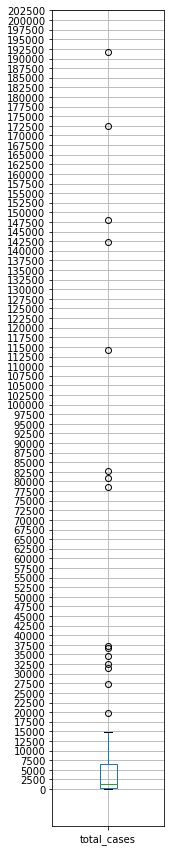

In [37]:
ax1=df[["total_cases"]][df["total_cases"]<=204000].boxplot(figsize=(2,15), column='total_cases', showfliers=True)
ax1.set_yticks(np.arange(0,204000,2500))
plt.show()

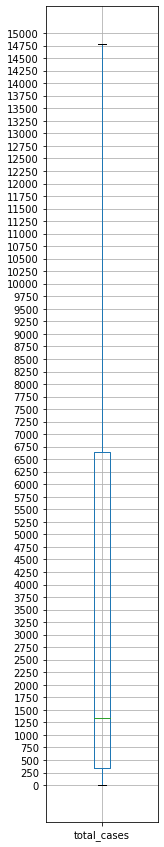

In [38]:
ax1=df[["total_cases"]].boxplot(figsize=(2,15), column='total_cases', showfliers=False)
ax1.set_yticks(np.arange(0,15250,250))
plt.show()

In [39]:
df["total_cases_cat"]=df.total_cases.apply(lambda x: 0)
#categorizing target variable
def categorize_cases(x):    
    result=0;
    if x>=0 and x<1500:
        for i in range(0,1500,150):
            j=i
            i+=150
            if(x>=j and x<i):
                string = str(x) +" >= "+str(j)+ " and "+ str(x) +" < " +str(i) +" return = "+str(result)
                print(string)
                break
            else:
                result+=1
                continue
        return result
    elif x>=1500 and x<15000:
        result = 9
        for i in range(1500,15000,1500):
            j=i
            i+=1500
            if(x>=j and x<i):
                string = str(x) +" >= "+str(j)+ " and "+ str(x) +" < " +str(i) +" return = "+str(result)
                print(string)
                break
            else:
                result+=1
                continue
        return result
    
    elif x>=15000 and x<40000:        
        string = str(x) +" >= "+str(15000)+ " and "+ str(x) +" < " +str(40000) +" return = "+str(19)
        print(string)                
        return 19
    
    elif x>=40000 and x<115000:
        string = str(x) +" >= "+str(40000)+ " and "+ str(x) +" < " +str(115000) +" return = "+str(20)
        print(string)                
        return 20
    
    elif x>=115000 and x<712720:
        string = str(x) +" >= "+str(115000)+ " and "+ str(x) +" < " +str(712719) +" return = "+str(21)
        print(string)                
        return 21
    
df1 = df[["total_cases"]].sort_values("total_cases",ascending=True)
df["total_cases_cat"]=df1[df1.columns[0]].apply(categorize_cases)

5.0 >= 0 and 5.0 < 150 return = 0
7.0 >= 0 and 7.0 < 150 return = 0
9.0 >= 0 and 9.0 < 150 return = 0
9.0 >= 0 and 9.0 < 150 return = 0
15.0 >= 0 and 15.0 < 150 return = 0
17.0 >= 0 and 17.0 < 150 return = 0
19.0 >= 0 and 19.0 < 150 return = 0
19.0 >= 0 and 19.0 < 150 return = 0
24.0 >= 0 and 24.0 < 150 return = 0
35.0 >= 0 and 35.0 < 150 return = 0
38.0 >= 0 and 38.0 < 150 return = 0
44.0 >= 0 and 44.0 < 150 return = 0
49.0 >= 0 and 49.0 < 150 return = 0
57.0 >= 0 and 57.0 < 150 return = 0
66.0 >= 0 and 66.0 < 150 return = 0
76.0 >= 0 and 76.0 < 150 return = 0
84.0 >= 0 and 84.0 < 150 return = 0
98.0 >= 0 and 98.0 < 150 return = 0
105.0 >= 0 and 105.0 < 150 return = 0
108.0 >= 0 and 108.0 < 150 return = 0
114.0 >= 0 and 114.0 < 150 return = 0
116.0 >= 0 and 116.0 < 150 return = 0
143.0 >= 0 and 143.0 < 150 return = 0
147.0 >= 0 and 147.0 < 150 return = 0
163.0 >= 150 and 163.0 < 300 return = 1
190.0 >= 150 and 190.0 < 300 return = 1
202.0 >= 150 and 202.0 < 300 return = 1
216.0 >= 150

In [40]:
#creating new category column
for i in range(0,df.shape[0]):
    category_num=0
    if(i%10==0):
        df["country_cat"] = df["country"].apply(lambda x: 0)
#categorizing countries
category_num=0
for i in df.T:    
    if(i%5==0):
        category_num+=1
        df["country_cat"][i]=(category_num)
    elif i%5 != 0:
        df["country_cat"][i]=(category_num)

d:\programs\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
d:\programs\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<BarContainer object of 136 artists>

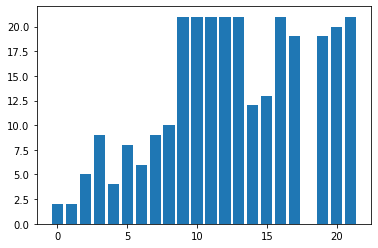

In [41]:
plt.bar(df.total_cases_cat,df.total_deaths_cat)

In [42]:
df["mortality"] = (df["total_cases"].values)/(df["total_deaths"].values)

In [43]:
country=df.country.tolist()
mortality=df.mortality.tolist()

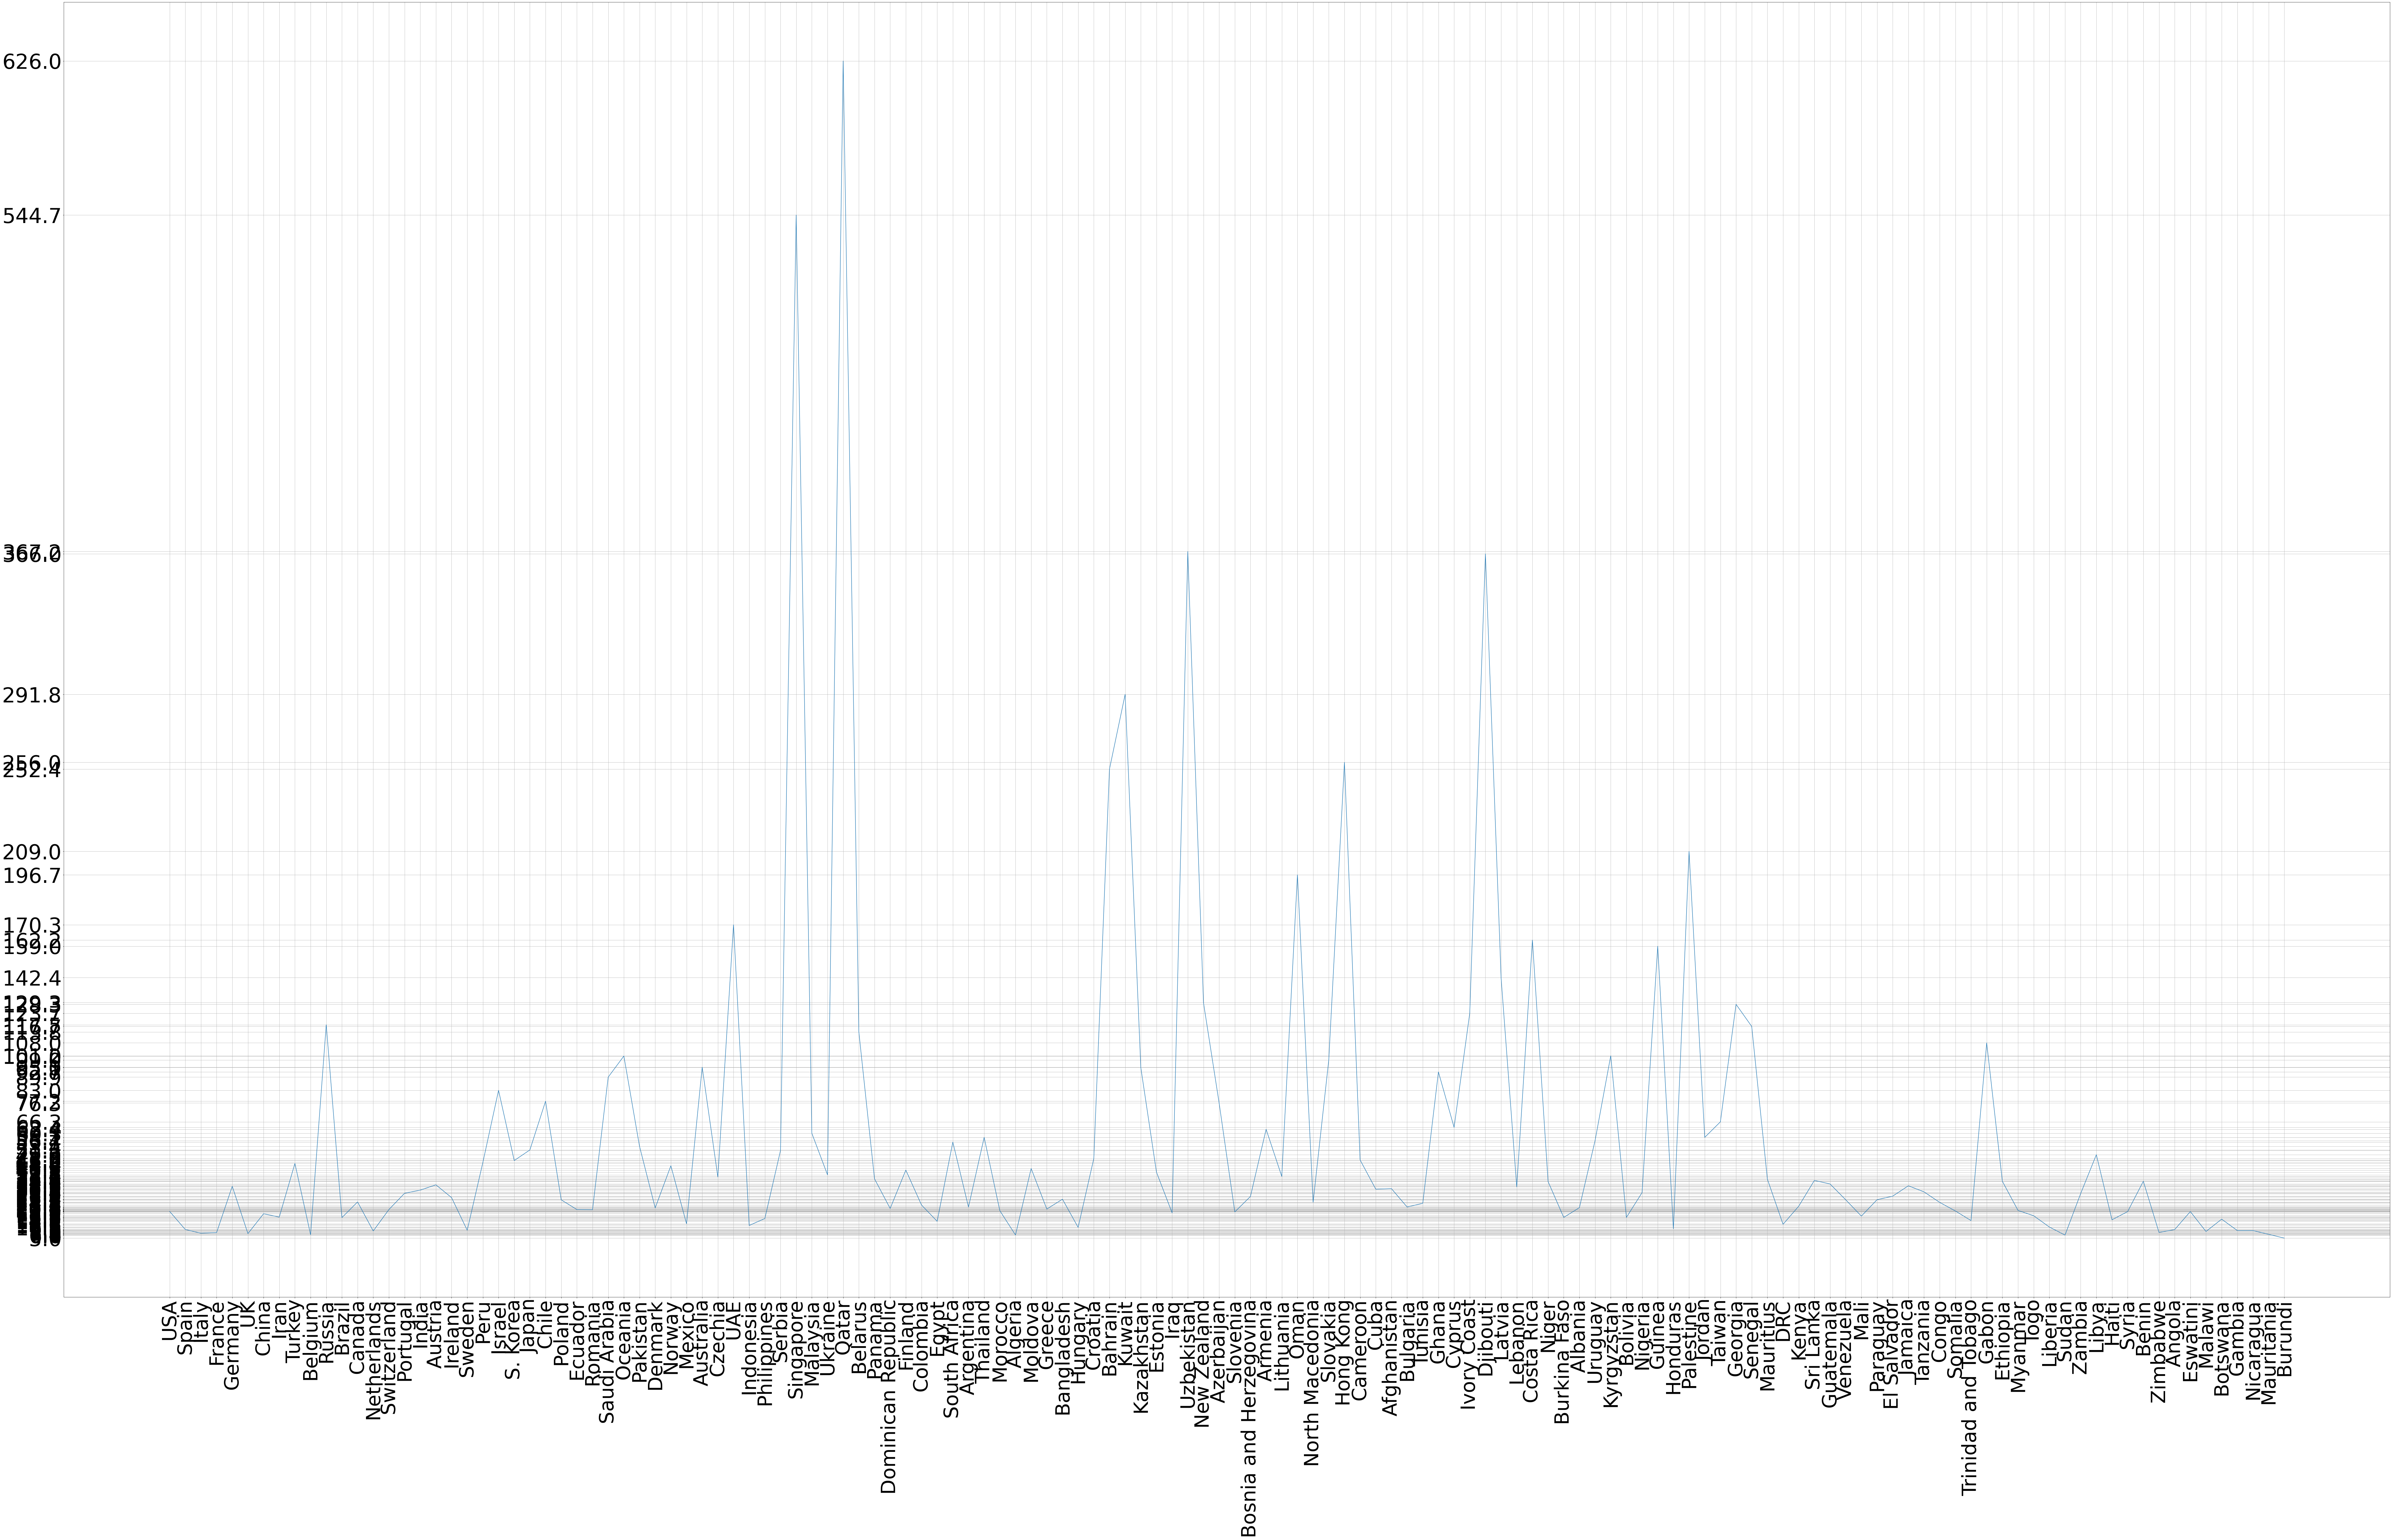

In [44]:
plt.figure(figsize=(140,80))
plt.plot(country,mortality)
plt.xticks(country)
plt.yticks(mortality)
plt.yticks(fontsize=70)
plt.xticks(fontsize=66, rotation = 90)
plt.grid()
plt.show()

In [45]:
df.corr()
#shows most correlated columns with total_deaths are total_cases,total_recovered,active_cases,critical which will be used for training after categorization

,total_cases,total_deaths,total_recovered,active_cases,critical,cases_per_mill,deaths_per_mill,lat,lng,lat_cat,lng_cat,critical_cat,cases_per_mill_cat,total_recovered_cat,deaths_per_mill_cat,total_deaths_cat,total_cases_cat,country_cat,mortality
total_cases,1.000000,0.913851,0.687584,0.979733,0.895198,0.476414,0.430068,0.178464,-0.157185,0.165628,-0.161906,0.428601,0.349590,0.385144,0.361699,0.366942,0.436682,-0.382609,-0.094079
total_deaths,0.913851,1.000000,0.699665,0.866773,0.861732,0.599015,0.674988,0.202616,-0.148466,0.189487,-0.153381,0.449437,0.396713,0.402850,0.421897,0.395321,0.467798,-0.404746,-0.128100
total_recovered,0.687584,0.699665,1.000000,0.530055,0.733791,0.520675,0.492662,0.196819,-0.017544,0.192427,-0.019458,0.468456,0.370584,0.514215,0.413170,0.438453,0.541675,-0.470813,-0.122003
active_cases,0.979733,0.866773,0.530055,1.000000,0.841418,0.404843,0.350986,0.154470,-0.177418,0.140680,-0.182492,0.370912,0.304705,0.310237,0.306704,0.308291,0.361798,-0.318462,-0.074679
critical,0.895198,0.861732,0.733791,0.841418,1.000000,0.521688,0.503362,0.144418,-0.189444,0.128326,-0.193638,0.513226,0.382277,0.417259,0.403167,0.401886,0.479287,-0.413001,-0.120542
cases_per_mill,0.476414,0.599015,0.520675,0.404843,0.521688,1.000000,0.837601,0.422270,-0.075160,0.421912,-0.073619,0.549336,0.810463,0.495890,0.746449,0.546125,0.676954,-0.620356,0.050519
deaths_per_mill,0.430068,0.674988,0.492662,0.350986,0.503362,0.837601,1.000000,0.312794,-0.090808,0.305344,-0.091909,0.444532,0.550900,0.403664,0.579862,0.466745,0.533222,-0.468030,-0.162327
lat,0.178464,0.202616,0.196819,0.154470,0.144418,0.422270,0.312794,1.000000,0.061138,0.925253,0.073917,0.330554,0.524303,0.296111,0.483269,0.407360,0.453647,-0.442883,-0.000214
lng,-0.157185,-0.148466,-0.017544,-0.177418,-0.189444,-0.075160,-0.090808,0.061138,1.000000,0.156186,0.997568,-0.090815,-0.018047,0.169089,-0.149852,-0.037719,0.100016,-0.121629,0.255290
lat_cat,0.165628,0.189487,0.192427,0.140680,0.128326,0.421912,0.305344,0.925253,0.156186,1.000000,0.156462,0.308943,0.545831,0.321351,0.478985,0.383883,0.464838,-0.449557,0.033984


In [192]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd

In [47]:
np.set_printoptions(precision=3)

In [69]:
#X = df.drop(["country","continent","deaths_cat"],axis=1).values
X = df[["lat_cat","lng_cat","total_cases_cat","cases_per_mill_cat","critical_cat","total_recovered_cat"]].values
Y = df["total_deaths_cat"].values

In [70]:
model = SelectKBest(score_func=chi2,k=4)
fit = model.fit(X,Y)
print(fit.scores_)

[ 69.333  54.206 607.239 316.36  253.516 509.732]


In [71]:
X1 = df[["total_cases_cat","cases_per_mill_cat","total_recovered_cat"]].values
Y1 = df["total_deaths_cat"].values

In [72]:
model = LogisticRegression(solver="liblinear")
rfe = RFE(model,3)
fit = rfe.fit(X,Y)
print(fit.support_)
print(fit.ranking_)

[ True False  True False  True False]
[1 2 1 4 1 3]


In [73]:
X2 = df[["lat_cat","total_cases_cat","critical_cat"]].values
Y2 = df["total_deaths_cat"].values

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1,test_size=0.3,random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,Y2,test_size=0.3,random_state=42)

In [75]:
model = ExtraTreesClassifier(criterion="gini")
model.fit(X,Y)
print(model.feature_importances_)
y_predict=model.predict(x_test)

#print("Classification Report: \n%s\n" %classification_report(y_predict,y_test))
result = str(accuracy_score(y_predict,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)
#print("Confusion Matrix: \n%s" %confusion_matrix(y_predict,y_test))

[0.148 0.162 0.207 0.162 0.158 0.163]
Accuracy: 
100.0%



In [76]:
model = DecisionTreeClassifier()
fit = model.fit(X,Y)
y_pred = fit.predict(x_test)

result = str(accuracy_score(y_pred,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
100.0%



In [77]:
model = RandomForestClassifier()
fit = model.fit(X,Y)
y_pred = fit.predict(x_test)

result = str(accuracy_score(y_pred,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
100.0%



In [78]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X,Y)
y_pred= model.predict(x_test)

result = str(accuracy_score(y_pred,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
65.85365853658537%



In [79]:
model = ExtraTreesClassifier(criterion="gini")
model.fit(X1,Y1)
print(model.feature_importances_)
y_predict=model.predict(x_test1)

#print("Classification Report: \n%s\n" %classification_report(y_predict,y_test))
result = str(accuracy_score(y_predict,y_test1)*100)+str("%")
print("Accuracy: \n%s\n"%result)
#print("Confusion Matrix: \n%s" %confusion_matrix(y_predict,y_test))

[0.37  0.335 0.296]
Accuracy: 
92.6829268292683%



In [80]:
model = DecisionTreeClassifier()
fit = model.fit(X1,Y1)
y_pred = fit.predict(x_test1)

result = str(accuracy_score(y_pred,y_test1)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
92.6829268292683%



In [81]:
model = RandomForestClassifier()
fit = model.fit(X1,Y1)
y_pred = fit.predict(x_test1)

result = str(accuracy_score(y_pred,y_test1)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
92.6829268292683%



In [82]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X1,Y1)
y_pred= model.predict(x_test1)

result = str(accuracy_score(y_pred,y_test1)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
60.97560975609756%



In [83]:
model = ExtraTreesClassifier(criterion="gini")
model.fit(X2,Y2)
print(model.feature_importances_)
y_predict=model.predict(x_test2)

#print("Classification Report: \n%s\n" %classification_report(y_predict,y_test))
result = str(accuracy_score(y_predict,y_test2)*100)+str("%")
print("Accuracy: \n%s\n"%result)
#print("Confusion Matrix: \n%s" %confusion_matrix(y_predict,y_test))

[0.322 0.391 0.287]
Accuracy: 
97.5609756097561%



In [84]:
model = DecisionTreeClassifier()
fit = model.fit(X2,Y2)
y_pred = fit.predict(x_test2)

result = str(accuracy_score(y_pred,y_test2)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
97.5609756097561%



In [85]:
model = RandomForestClassifier()
fit = model.fit(X2,Y2)
y_pred = fit.predict(x_test2)

result = str(accuracy_score(y_pred,y_test2)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
95.1219512195122%



In [86]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X2,Y2)
y_pred= model.predict(x_test2)

result = str(accuracy_score(y_pred,y_test2)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
56.09756097560976%



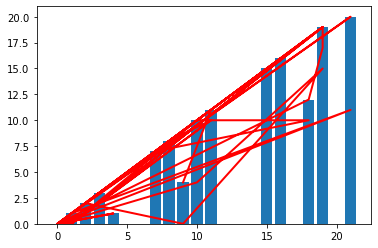

In [99]:
plt.plot(y_test2, y_pred, color='red', linewidth=2)
plt.bar(y_test2, y_pred)
plt.show()

In [ ]:
#now with linear regression

In [100]:
df = pd.read_excel("covid_pak.xlsx")

In [101]:
df.head()
df.drop(["Tests  performed in last 24 hours","Still admitted","New  (last 24 hrs)"], axis=1, inplace = True)

In [102]:
sindh = df[df["Region"]=="Sindh"]
punjab = df[df["Region"]=="Punjab"]

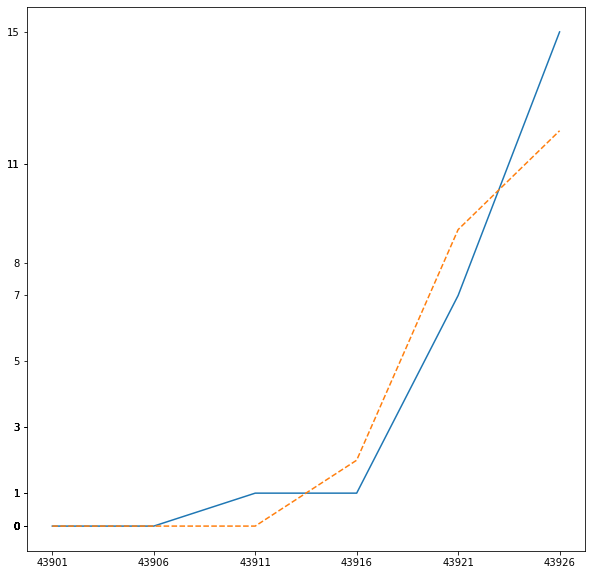

In [103]:
#Simple PLOT
plt.figure(figsize=(10,10))
plt.plot(sindh.Date[0:sindh.shape[0]:5], sindh.Expired[0:df.shape[0]:5], '-')
plt.plot(punjab.Date[0:punjab.shape[0]:5], punjab.Expired[0:df.shape[0]:5], '--')

plt.xticks(sindh.Date[0:df.shape[0]:5])
plt.yticks(df.Expired[0:df.shape[0]:5])


plt.show()

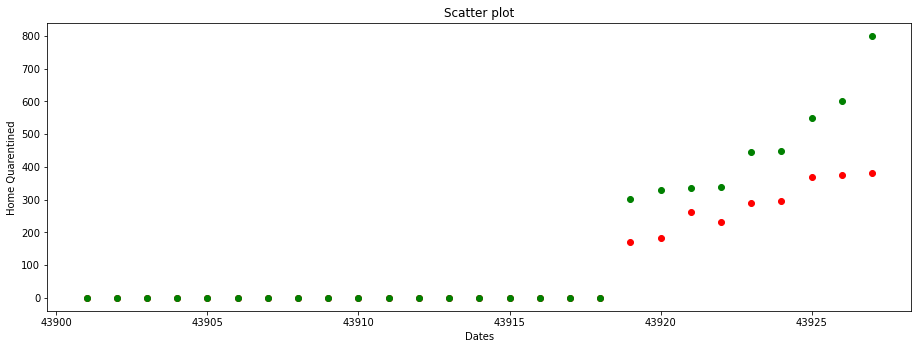

In [104]:
fig=plt.figure()
ax=fig.add_axes([1,1,2,1])
ax.scatter(sindh.Date, sindh["Home Quarantine"], color='r')
ax.scatter(punjab.Date, punjab["Home Quarantine"], color='g')

ax.set_xlabel('Dates')
ax.set_ylabel('Home Quarentined')
ax.set_title('Scatter plot')
plt.show()


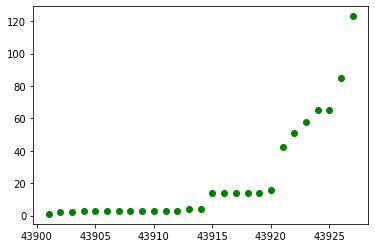

In [105]:
plt.scatter(sindh.Date,sindh.Discharged ,color='Green')



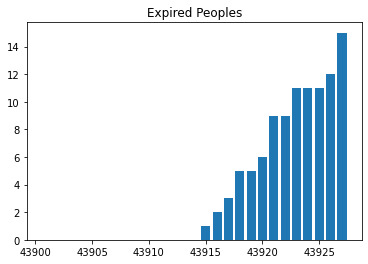

In [106]:
plt.bar(punjab.Date, punjab.Expired)
plt.title('Expired Peoples')
plt.show()

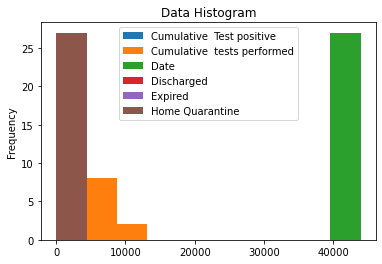

In [107]:
sindh.plot.hist()
plt.title('Data Histogram')
plt.show()

In [108]:
regionLabels=[]
for i in df.Region.unique():
    regionLabels.append(i)

In [109]:
regionColors=[]
for i in range(1,len(regionLabels)+1):
    regionColors.append('#'+'C77D'+str(i)+'E')

In [110]:
eachRegionCount = []
for i in regionLabels:
    eachRegionCount.append(df[df["Region"]==i].count()[0])

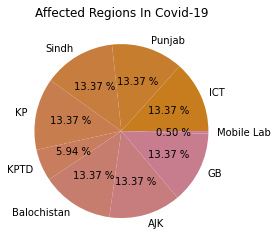

In [111]:

plt.pie(eachRegionCount,labels = regionLabels,colors =regionColors,autopct='%.2f %%')
plt.title('Affected Regions In Covid-19')
plt.show()

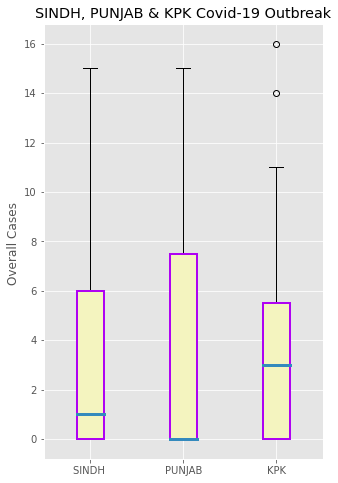

In [112]:
plt.style.use('ggplot')
plt.figure(figsize=(5,8))
CIS = df.Expired[df.Region=='Sindh']
CIP = df.Expired[df.Region=='Punjab']
CIKP = df.Expired[df.Region=='KP']
labels = ['SINDH ','PUNJAB','KPK']

boxes = plt.boxplot([CIS,CIP,CIKP],labels=labels,patch_artist=True,medianprops={'linewidth':3})
for box in boxes['boxes']:
    #change Edge Color
    box.set(color='#af02f3',linewidth=2)
    #Change face color
    box.set(facecolor='#f4f4bf')

plt.title('SINDH, PUNJAB & KPK Covid-19 Outbreak')
plt.ylabel('Overall Cases ')
plt.show()

In [113]:
df.head()

,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,Region
0,2,80,43901,0,0,0,ICT
1,0,95,43901,0,0,0,Punjab
2,14,171,43901,1,0,0,Sindh
3,0,28,43901,0,0,0,KP
4,0,0,43901,0,0,0,KPTD


In [114]:
regions=df["Region"].tolist()
Expired=df["Expired"].tolist()
date_of_cases=df["Date"]

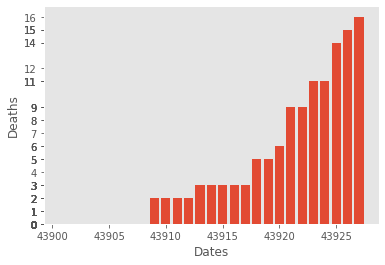

In [115]:
plt.bar(date_of_cases,Expired)

plt.yticks(Expired)
plt.grid()
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.show()

In [116]:
df.Region.value_counts()

KP             27
ICT            27
Balochistan    27
Punjab         27
Sindh          27
AJK            27
GB             27
KPTD           12
Mobile Lab      1
Name: Region, dtype: int64

In [117]:
list = df["Region"].unique().tolist()

In [118]:
for i,row in df[["Region"]].iterrows():
    if row["Region" in list]:      
         df["Region"][i]=(list.index(df["Region"][i]))
            

d:\programs\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
# another way of conversion

indexes=[]
for i in list:
    indexes.append(list.index(i))
df["Region"].replace(list,indexes,inplace =True)

In [170]:
x = df['Cumulative  Test positive'].values.reshape(-1,1)
y = df['Expired'].values.reshape(-1,1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [172]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9009726483393201
Mean Squared Error: 7.148671310958146
Root Mean Squared Error: 2.6736999291166064


In [174]:
y_pred = model.predict(X_test)

In [175]:
prediction_df= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

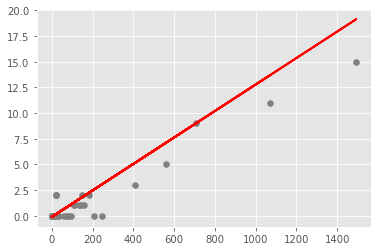

In [176]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [177]:
model = RandomForestRegressor()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

d:\programs\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


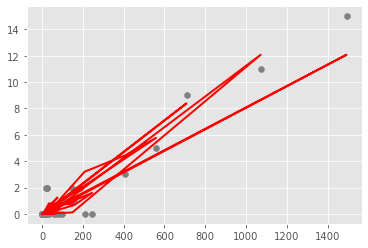

In [178]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [183]:
model1 = DecisionTreeRegressor(max_depth=2)
model2 = DecisionTreeRegressor(max_depth=5)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)


y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test) 

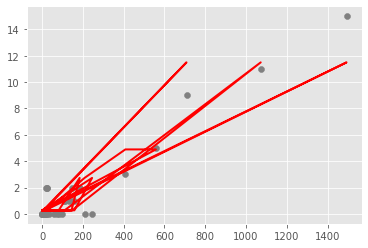

In [184]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred1, color='red', linewidth=2)
plt.show()

In [187]:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})

,Actual,Predicted
0,0,0.273504
1,0,0.273504
2,0,0.273504
3,2,0.273504
4,11,11.500000
5,1,0.273504
6,0,0.273504
7,0,0.273504
8,9,11.500000
9,0,0.273504


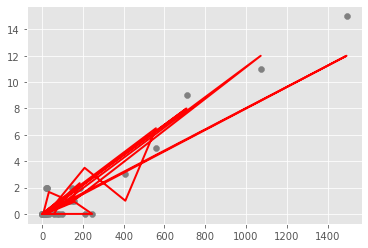

In [186]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred2, color='red', linewidth=2)
plt.show()

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred1, color='red', linewidth=2)
plt.show()

In [188]:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})

,Actual,Predicted
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,2,0.923077
4,11,12.000000
5,1,0.923077
6,0,0.000000
7,0,0.000000
8,9,8.000000
9,0,0.000000


In [198]:
print(r2_score(y_pred,y_test))
print(r2_score(y_pred1,y_test))
print(r2_score(y_pred2,y_test))

0.8749986475712771
